<a href="https://colab.research.google.com/github/StephMcCallum/MSE563-SM/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#HW4
import numpy
directions = [numpy.array((1,0,0)),numpy.array((0,-1,0)),numpy.array((-1,0,0)),numpy.array((0,1,0)),numpy.array((0,0,1)),numpy.array((0,0,-1))]
def pbc(site,L): #The convention here is to have positive lattice indices
  for i,s in enumerate(site):
    if s >= L:
      site[i] = s - L
    elif s < 0:
      site[i] = s + L
  return site

class grid():
  def __init__(self,N=5,L=4,T=1.0):
    self.L = L
    self.N = N
    self.epsilon = -1
    self.kT = T
    self.particles = []
    for i in range(self.N):
      self.particles.append(particle())
      while True:
        rands = self.random_site()
        if not self.occupied(rands):
          self.particles[-1].location = rands
          break
    self.E = self.energy()

  def occupied(self,site):
    for p in self.particles:
      if numpy.array_equal(p.location,site):
        return True
    return False

  '''def neighbors(self,site):
    list_neighbors = []
    for i in range(self.N):
      if self.particles[i].location != site:
        list_neighbors.append(self.particles[i])
    return list_neighbors'''

  def random_site(self):
    return numpy.array((numpy.random.rand(self.L),numpy.random.rand(self.L),numpy.random.rand(self.L)))

  def distance(self,site1,site2):
    return numpy.linalg.norm(site1-site2)

  def lennard_jones_potential(self,r, epsilon=1.0, sigma=1.0,r_cut=2.5):
    # Ensure r is not zero to avoid division by zero
    if r == 0:
      return numpy.inf  # Infinite potential if particles overlap
    if r > r_cut:
      return 0
    # Calculate the Lennard-Jones potential
    potential = 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    return potential

  def energy(self):
    energy = 0
    for p in self.particles:
      #neighbors = self.neighbors()
      for n in self.particles:
        if self.occupied(n.location) and not numpy.array_equal(n.location,p.location):
          r = self.distance(p.location,n.location)
          energy += self.lennard_jones_potential(r)
    return energy/2

  def __repr__(self):
    m = numpy.zeros((self.L,self.L,self.L))
    for p in self.particles:
      m[tuple(p.location)] = 1
    return str(m)

class particle():
  def __init__(self):
    self.location = numpy.array((-1.0,-1.0,-1.0)) #negative index means unplaced

'''  def get_neighbors(self,L):
    neighbors = []
    for d in directions:
      neighbors.append( pbc(d+self.location, L))
    return neighbors'''

class simulation():
  def __init__(self,N=5,L=3,T=1.,steps = 1000,seed=2):
    numpy.random.seed(seed)
    self.grid = grid(N,L,T)
    self.accepted = 0
    self.rejected = 0
    self.energies = numpy.zeros(steps)
    for i in range(steps):
      self.trial_move()
      self.energies[i] = self.grid.E/N
      #if i%1000 == 0:
      #  print(i)
      #  print(self.grid.E)
      #  print(self.grid)

  def trial_move(self):
    p = numpy.random.choice(self.grid.particles)
    old = p.location
    oldE = self.grid.E
    trial = self.grid.random_site()
    if not self.grid.occupied(trial):
      p.location = trial
      E = self.grid.energy()
      dE = E - oldE
      if numpy.random.rand() < numpy.exp(-dE/self.grid.kT):
        self.grid.E = E
        self.accepted += 1
        return
    p.location = old #need to reject moves that are overlaps
    self.grid.E = oldE
    self.rejected += 1


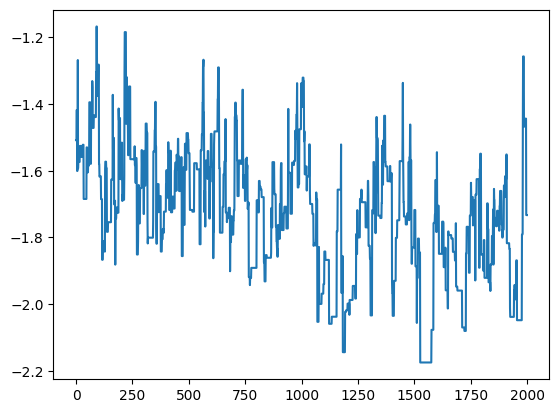

In [8]:
import matplotlib.pyplot as plt
s = simulation(N=6,L=4,T=0.5,steps=2000, seed = 2)
plt.plot(s.energies)

In [ ]:
import time
for N in [5,10,50,100,200,500]:
  t1 = time.perf_counter()
  s = simulation(N=N,L=100,T=0.5,steps=100, seed = 2)
  t2 = time.perf_counter()
  print("\nN=",N,"seconds/100steps =", t2-t1)
  if t2-t1 > 30:
    print("Taking a minute for 200 steps. TOO SLOW")
    break


0
0.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 5 seconds/100steps = 0.06368385799942189
0
0.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 10 seconds/100steps = 0.15734932699979254
0
-1.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 50 seconds/100steps = 4.362202834000527
0
-4.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 100 seconds/100steps = 13.763136806000148
0
-8.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 20

In [ ]:
import matplotlib.pyplot as plt
energies = []
Ts =  [4,2,1,0.9,0.7, 0.5, 0.2]
for T in Ts:
  print("T=",T)
  s = simulation(N=20,L=7,T=T,steps=10000, seed = numpy.random.randint(100000))
  energies.append(s.energies)

T= 4
T= 2
T= 1
T= 0.9
T= 0.7
T= 0.5
T= 0.2


In [ ]:
for T,e in zip(Ts,energies):
  print("T=",T, ", <E>=", numpy.array(e).mean())
#hard to say from the energy averages when N<10, but looking at the configurations
#maybe clustering starts to happen more around 0.7
#though the plots look qualitatively different at 0.5.

#rerunning with N=20, L=7, maxT=10000, looks like it'll take about 3 min.

T= 4 , <E>= -0.8635200000000001
T= 2 , <E>= -0.9285399999999999
T= 1 , <E>= -1.0862749999999999
T= 0.9 , <E>= -1.10584
T= 0.7 , <E>= -1.1992800000000001
T= 0.5 , <E>= -1.3737799999999998
T= 0.2 , <E>= -1.5804500000000004


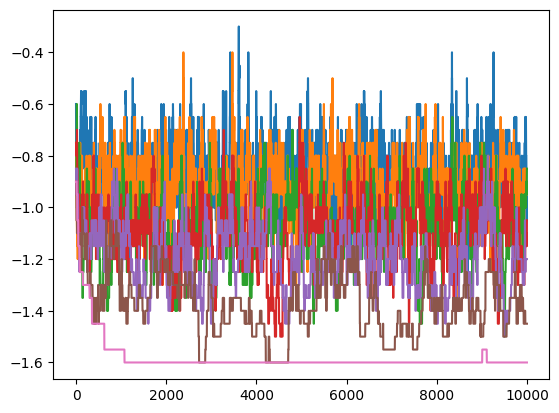

In [ ]:
for e in energies:
  plt.plot(e)
# Yeah, 0.2 clusters up at the energy minimum, 0.5 touches it, and 0.7 starts clumping.